This data belongs to Book-Crossing community. It was collected in 4 weeks (Aug-Sep 2004) and has 3 different tables: Users, books and rating. Since the date is 2004, when internet was not commmon enough, and period was only 4 weeks, the data set is relatively small compared to other public data set. <br>
For more detail and data set: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
%matplotlib inline

from surprise import Reader, Dataset, SVD, evaluate

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\ProgramData\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
ratings=pd.read_csv("BX-Book-Ratings.csv", sep=";", encoding="latin-1", error_bad_lines=False)
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [3]:
users=pd.read_csv("BX-Users.csv", sep=";", encoding="latin-1", error_bad_lines=False)
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
books=pd.read_csv("BX-Books.csv", sep=";", encoding="latin-1", error_bad_lines=False)
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
User-ID        1149780 non-null int64
ISBN           1149780 non-null object
Book-Rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
User-ID     278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271360 non-null object
Year-Of-Publication    271360 non-null object
Publisher              271358 non-null object
Image-URL-S            271360 non-null object
Image-URL-M            271360 non-null object
Image-URL-L            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
ratings[["Book-Rating"]].describe()

,Book-Rating
count,1.149780e+06
mean,2.866950e+00
std,3.854184e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,7.000000e+00
max,1.000000e+01


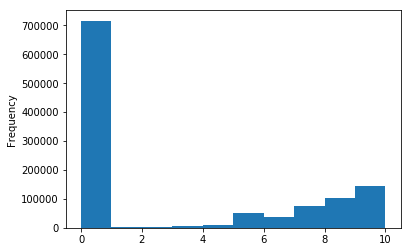

In [9]:
## Histogram of Book Ratings

ratings["Book-Rating"].plot(kind="hist")

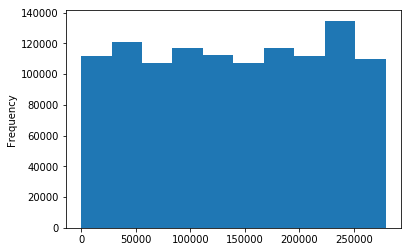

In [10]:
ratings["User-ID"].plot(kind="hist")

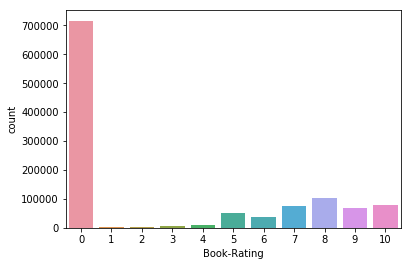

In [11]:
sns.countplot(ratings["Book-Rating"])

In [12]:
frequency_of_user=ratings["User-ID"].value_counts()
frequency_of_ratings=ratings["Book-Rating"].value_counts()
frequency_of_ISBN=ratings["ISBN"].value_counts()

In [13]:
frequency_of_user=frequency_of_user.to_frame("Frequency")

In [14]:
frequency_of_user.head()

,Frequency
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850


In [15]:
## Number of unique user-id
len(ratings["User-ID"].unique())

105283

In [16]:
## Number of users gave feedback once
len(frequency_of_user[frequency_of_user["Frequency"] == 1])

59166

If we remove users who gave rating once, we would remove half of data set. So, let's keep it and try to recommending by including them. 

In [17]:
## Number of users gave feedback twice
len(frequency_of_user[frequency_of_user["Frequency"] == 2])

12502

In [18]:
## Number of users gave feedback three or more times
len(frequency_of_user[frequency_of_user["Frequency"] > 2])

33615

In [19]:
## Modelling 

svd = SVD()

In [20]:
ratings_for_model_2 = Dataset.load_from_df(ratings[["User-ID", "ISBN", "Book-Rating"]], Reader())

In [21]:
evaluate(svd, ratings_for_model_2, measures=["RMSE", "MAE"])

C:\ProgramData\Anaconda3\lib\site-packages\scikit_surprise-latest-py3.6-win-amd64.egg\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scikit_surprise-latest-py3.6-win-amd64.egg\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 3.5102
MAE:  2.9844
------------
Fold 2
RMSE: 3.4978
MAE:  2.9754
------------
Fold 3
RMSE: 3.5058
MAE:  2.9833
------------
Fold 4
RMSE: 3.5035
MAE:  2.9796
------------
Fold 5
RMSE: 3.5059
MAE:  2.9827
------------
------------
Mean RMSE: 3.5046
Mean MAE : 2.9811
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [2.9844359769385758,
                             2.9754187708809714,
                             2.9832627522458597,
                             2.9796447874603955,
                             2.9826724604129331],
                            'rmse': [3.5102291841574083,
                             3.497786543514501,
                             3.5058089447227014,
                             3.5034662189702757,
                             3.5059079227236061]})

In [22]:
trainset = ratings_for_model_2.build_full_trainset()
svd.train(trainset)

C:\ProgramData\Anaconda3\lib\site-packages\scikit_surprise-latest-py3.6-win-amd64.egg\surprise\prediction_algorithms\algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


In [23]:
## Recommendation for a few users
## History of user 276729 
user_276729 = ratings[(ratings["User-ID"] == 276729)]
user_276729 = user_276729.set_index("User-ID")
print(user_276729)

               ISBN  Book-Rating
User-ID                         
276729   052165615X            3
276729   0521795028            6


In [24]:
## Estimate Score

user_276729["Estimate_Score"] = user_276729["ISBN"].apply(lambda x: svd.predict(276729, x).est)

In [25]:
user_276729

,ISBN,Book-Rating,Estimate_Score
User-ID,,,
276729,052165615X,3,3.125665
276729,0521795028,6,3.969404


In [26]:
##Sorting with respect to estimate score

user_276729 = user_276729.sort_values("Estimate_Score", ascending=False)
print(user_276729.head(10))

               ISBN  Book-Rating  Estimate_Score
User-ID                                         
276729   0521795028            6        3.969404
276729   052165615X            3        3.125665


In [27]:
## Recommendation to user 6537 by considering his/her ratings more than 3 

user_6537 = ratings[(ratings["User-ID"] == 6537) & (ratings["Book-Rating"] > 3)]
user_6537 = user_6537.set_index("User-ID")
print(user_6537)

               ISBN  Book-Rating
User-ID                         
6537     0060391022            8
6537     0312859589            5
6537     0316284955            8
6537     0345407083            6
6537     0385488947            5
6537     0385492235            7
6537     0385722206            6
6537     0425161285            7
6537     0446516538            4
6537     0446522384            5
6537     0446524182            8
6537     0446672211            8
6537     0670865796            8
6537     0671729462            7
6537     0671785141            7
6537     0671891650            7
6537     0684853507            7
6537     0722513585            4
6537     0761516735           10
6537     1570671222           10


In [28]:
user_6537["Estimate_Score"] = user_6537["ISBN"].apply(lambda x: svd.predict(6537, x).est)

In [29]:
user_6537

,ISBN,Book-Rating,Estimate_Score
User-ID,,,
6537,0060391022,8,5.000000
6537,0312859589,5,4.595135
6537,0316284955,8,5.000000
6537,0345407083,6,5.000000
6537,0385488947,5,4.271684
6537,0385492235,7,5.000000
6537,0385722206,6,5.000000
6537,0425161285,7,5.000000
6537,0446516538,4,3.679706


In [30]:
##Sorting with respect to estimate score
user_6537 = user_6537.sort_values('Estimate_Score', ascending=False)
print(user_6537)

               ISBN  Book-Rating  Estimate_Score
User-ID                                         
6537     0060391022            8        5.000000
6537     0446672211            8        5.000000
6537     0761516735           10        5.000000
6537     0684853507            7        5.000000
6537     0671891650            7        5.000000
6537     0671785141            7        5.000000
6537     0671729462            7        5.000000
6537     0670865796            8        5.000000
6537     0446524182            8        5.000000
6537     0425161285            7        5.000000
6537     0385722206            6        5.000000
6537     0385492235            7        5.000000
6537     0345407083            6        5.000000
6537     0316284955            8        5.000000
6537     1570671222           10        5.000000
6537     0446522384            5        4.810564
6537     0312859589            5        4.595135
6537     0385488947            5        4.271684
6537     0446516538 

In [34]:
## Recommendation Engine

def recommendation(user_id):
    user = ratings.copy()
    already_read = ratings[ratings["User-ID"] == user_id]["ISBN"].unique()
    user = user.reset_index()
    user = user[~user["ISBN"].isin(already_read)]
    user["Estimate_Score"]=user["ISBN"].apply(lambda x: svd.predict(user_id, x).est)
    user = user.sort_values("Estimate_Score", ascending=False)
    print(user.head(10))

In [35]:
##Recommendation to user 276729

recommendation(276729)

           index  User-ID        ISBN  Book-Rating  Estimate_Score
922290    922290   224646  0451457994            8             5.0
1122940  1122940   269566  0394800168            0             5.0
425864    425864   101731  0394281829            7             5.0
737563    737563   178140  0804108749            0             5.0
425860    425860   101731  0385492081            0             5.0
145018    145018    32440  0679435824            0             5.0
425858    425858   101731  0385199570            0             5.0
845880    845880   204864  0141301066           10             5.0
1092790  1092790   262169  0385729332           10             5.0
845881    845881   204864  014131088X            0             5.0


In [36]:
##Recommendation to user 276729

recommendation(6537)

           index  User-ID        ISBN  Book-Rating  Estimate_Score
376241    376241    90616  0684848783            0             5.0
447050    447050   107244  0307001164            9             5.0
483765    483765   115120  039914465X            0             5.0
658717    658717   159847  3499226375            0             5.0
383350    383350    92861  0141001771            0             5.0
421895    421895   100846  0553292722            0             5.0
1004245  1004245   241198  3453071174            8             5.0
207637    207637    47974  068485368X           10             5.0
658705    658705   159847  0860074382            0             5.0
784901    784901   189835  0684853515            5             5.0


In the output, User-ID is the user by whose "collaboration" this book is recommended. Book-rating is his/her rating. <br>
Though the recommendation is done based on ISBN, it is possible to merge this recommendation with "books" data so that we can see names of books.